### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution? 
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

<b>Important: for Activity 3 and Activity 4 , please use the [file Data_Marketing_Customer_Analysis_Round3.csv](./Data/Data_Marketing_Customer_Analysis_Round3.csv) from the [Data](./Data) folder.</b>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
round3_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [10]:
round3_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


#### Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.  

In [11]:
# You can use np.number and np.object to select the numerical data types and categorical data types respectively
numerical = round3_df.select_dtypes(include = np.number)
categoricals = round3_df.select_dtypes(include = np.object)

/var/folders/1y/cx5kjkzn1c7f97jv38f_rcx40000gn/T/ipykernel_29346/542428762.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = round3_df.select_dtypes(include = np.object)


In [13]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


#### Now we will try to check the normality of the numerical variables visually

/Users/juanandresgiussani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

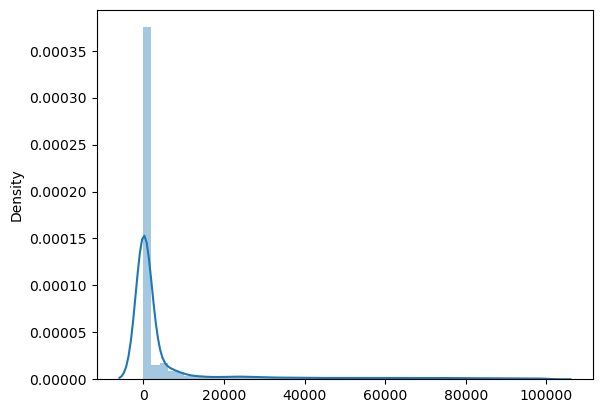

In [12]:
# Use seaborn library to construct distribution plots for the numerical variables
num_dplot = sns.distplot(numerical)

###  Use Matplotlib to construct histograms.

In [19]:
#Use Matplotlib to construct histograms.

##### customer_lifetime_value

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>]],
      dtype=object)

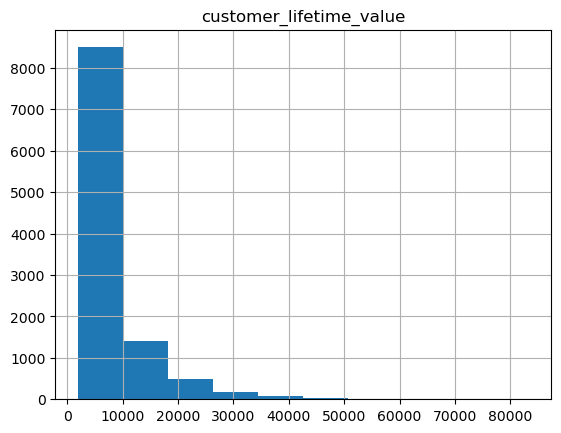

In [18]:
numerical.hist('customer_lifetime_value')

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

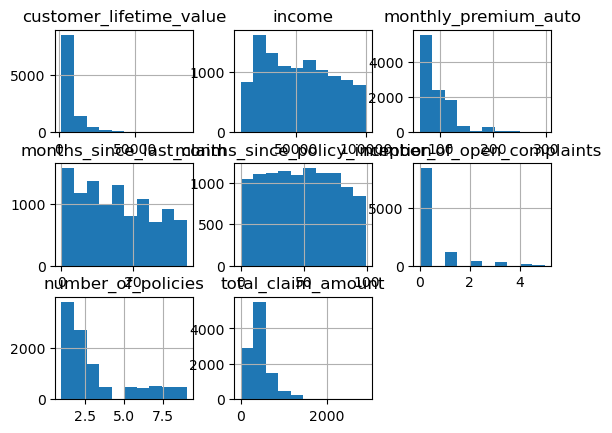

In [20]:
numerical.hist()

In [ ]:
# Do the distributions for different numerical variables look like a normal distribution?
# The variables that aproximate the normal distribution the most are:
    # Total claim amount
    # months_since_policy_inception
    # (income)
    

Text(0.5, 1.0, 'Relationship Income & Total claim amount')

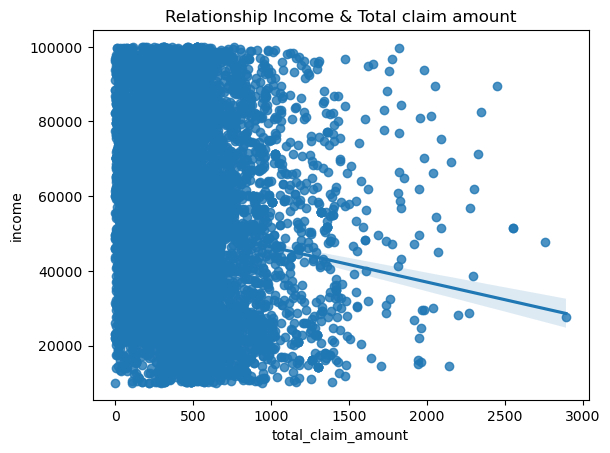

In [29]:
# For the numerical variables, 
# check for correlation between the input features 
# Note: this does not include the target feature

income_x_totalclaimamount = sns.regplot(x="total_claim_amount", y="income", data=numerical)
plt.title("Relationship Income & Total claim amount")

In [ ]:
# Visually it looks like there is no correlation between both variables

In [32]:
# calculate the correlaion with .corr()
round3_df[['income','customer_lifetime_value']].corr()



,income,customer_lifetime_value
income,1.000000,0.003732
customer_lifetime_value,0.003732,1.000000


<AxesSubplot:>

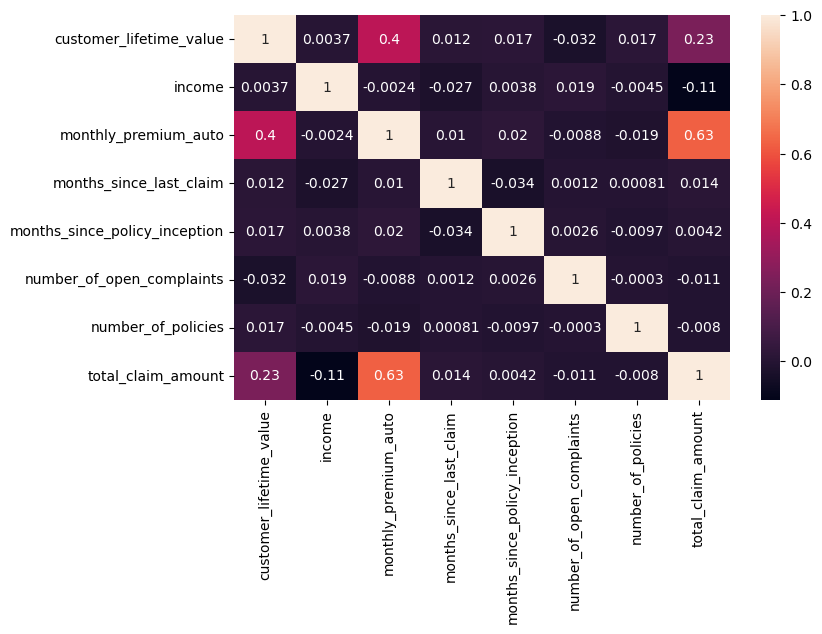

In [33]:
# we could use a heatmap for the rest of the variables in df numerical
heatmap=plt.figure(figsize=(8,5))
sns.heatmap(round3_df.corr(),annot=True)

# monthly premium auto x total claim amount have a relative strong and positive correlation.
# This means; if the higher the premium a costumer pays, the amount of claims will also rise.